In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Making a Function to plot series
def plot_series(time, series, start = 0, end = None, label= None):
    plt.figure(figsize=(10,10))
    plt.plot(time[start:end], series[start:end], label=label)
    plt.xlabel("Time")
    plt.ylabel("Series")
    plt.legend()
    plt.show()

# Trend and Seasonality

In [3]:
def trend(time, slope =0):
    return slope * time

# Let's create a time series that just trends upward:

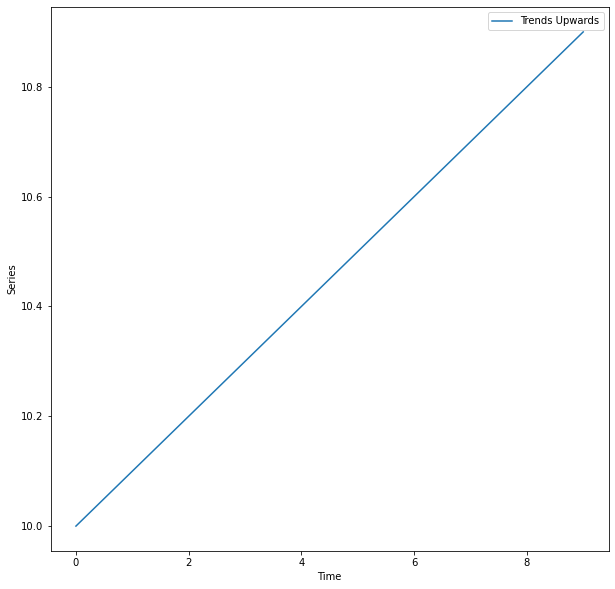

In [4]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)
plot_series(time, series, start=0, end= 10, label = "Trends Upwards")

In [5]:
print(time)
print(series)

[   0    1    2 ... 1458 1459 1460]
[ 10.   10.1  10.2 ... 155.8 155.9 156. ]


In [6]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1/np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

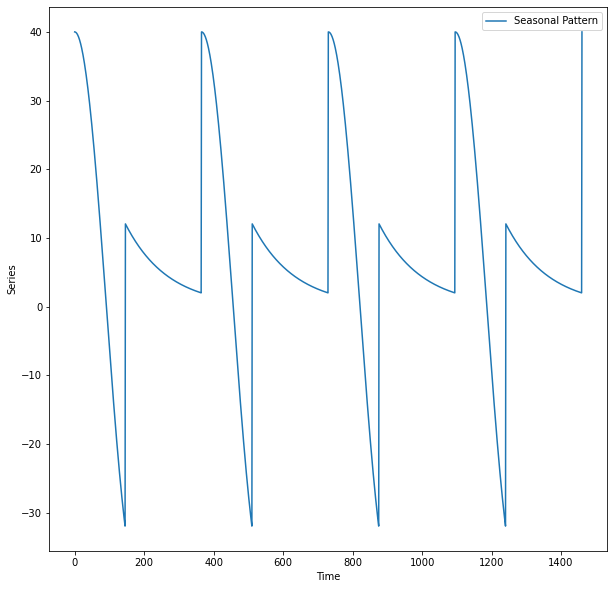

In [7]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series, label="Seasonal Pattern")

Now let's create a time series with both trend and seasonality:

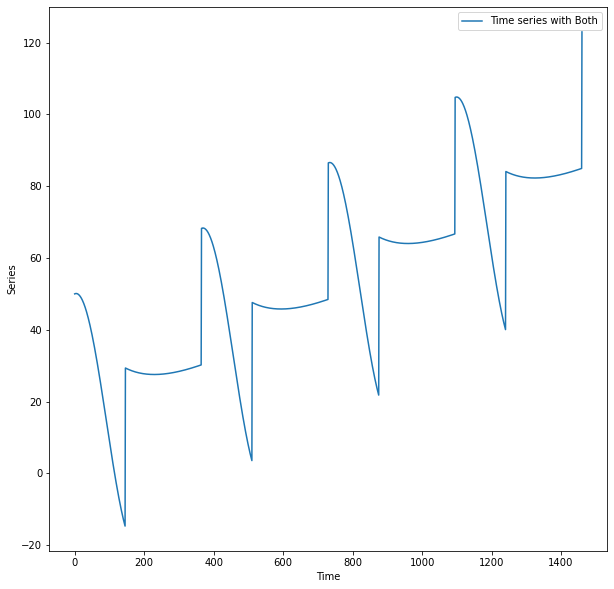

In [8]:
slope =0.05
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude=amplitude)
plot_series(time, series, label="Time series with Both")

# Noise
In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

In [9]:
def white_noise(time, noise_level = 1, seed = None):
    random = np.random.RandomState(seed = None)
    return random.randn(len(time)) * noise_level

No handles with labels found to put in legend.


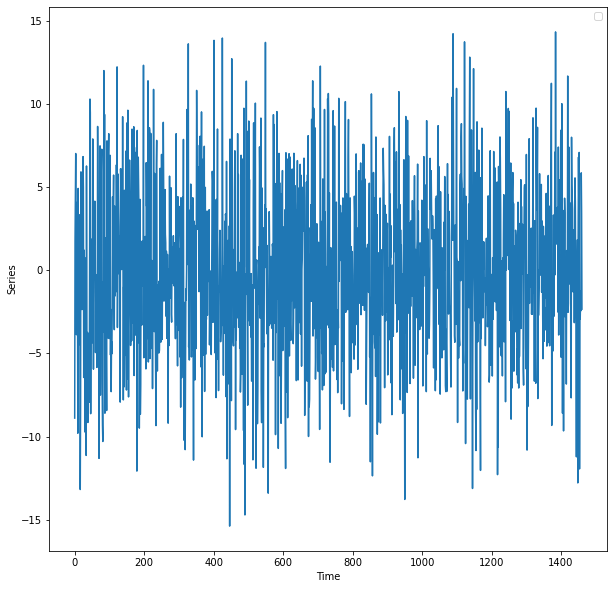

In [10]:
noise_level = 5
noise = white_noise(time, noise_level,seed=42)
plot_series(time, noise)

Now let's add this white noise to the time series:

No handles with labels found to put in legend.


<Figure size 720x432 with 0 Axes>

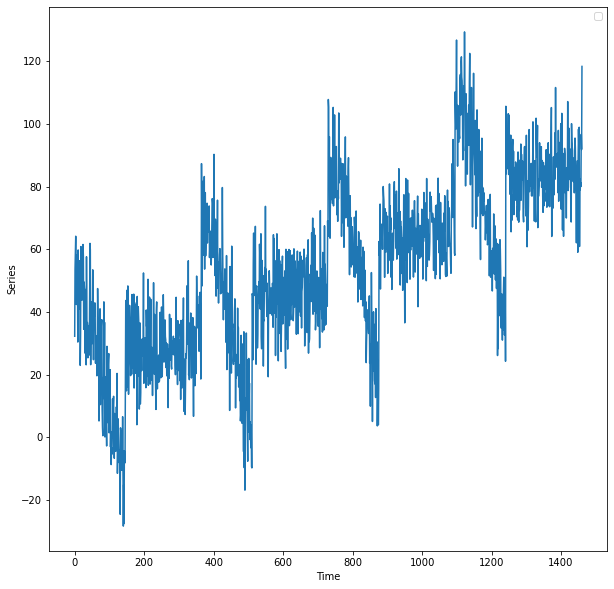

In [13]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()